In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
include("src/spiking.jl")
include("src/vsa.jl")

unbind (generic function with 2 methods)

In [3]:
using Plots

In [4]:
using StatsPlots: density

In [5]:
n_x = 101
n_y = 101
n_vsa = 1

1

In [6]:
repeats = 6

6

In [7]:
phases = collect([[x, y] for x in range(-1.0, 1.0, n_x), y in range(-1.0, 1.0, n_y)]) |> stack
phases = reshape(phases, (1,2,:))

1×2×10201 Array{Float64, 3}:
[:, :, 1] =
 -1.0  -1.0

[:, :, 2] =
 -0.98  -1.0

[:, :, 3] =
 -0.96  -1.0

;;; … 

[:, :, 10199] =
 0.96  1.0

[:, :, 10200] =
 0.98  1.0

[:, :, 10201] =
 1.0  1.0

In [8]:
b = bind(phases, dims=2)

1×1×10201 Array{Float64, 3}:
[:, :, 1] =
 0.0

[:, :, 2] =
 0.020000000000000018

[:, :, 3] =
 0.040000000000000036

;;; … 

[:, :, 10199] =
 -0.040000000000000036

[:, :, 10200] =
 -0.020000000000000018

[:, :, 10201] =
 0.0

In [9]:
ub = unbind(phases[1:1,1:1,:], phases[1:1,2:2,:])

1×1×10201 Array{Float64, 3}:
[:, :, 1] =
 0.0

[:, :, 2] =
 0.020000000000000018

[:, :, 3] =
 0.040000000000000036

;;; … 

[:, :, 10199] =
 -0.040000000000000036

[:, :, 10200] =
 -0.020000000000000018

[:, :, 10201] =
 0.0

In [10]:
spk_args = SpikingArgs(t_window=0.01)

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.02 (V)


In [11]:
tspan = (0.0, repeats*1.0)

(0.0, 6.0)

In [12]:
tbase = collect(tspan[1]:spk_args.dt:tspan[2]);

In [13]:
st_x = phase_to_train(phases[1:1,1:1,:], spk_args, repeats = repeats)
st_y = phase_to_train(phases[1:1,2:2,:], spk_args, repeats = repeats)

Spike Train: (1, 1, 10201) with 61206 spikes.

In [14]:
st_x.shape

(1, 1, 10201)

In [15]:
st_x

Spike Train: (1, 1, 10201) with 61206 spikes.

In [16]:
uout = bind(st_x, st_y, tspan=tspan, return_solution=true);

In [17]:
uout |> size

(1, 1, 10201, 601)

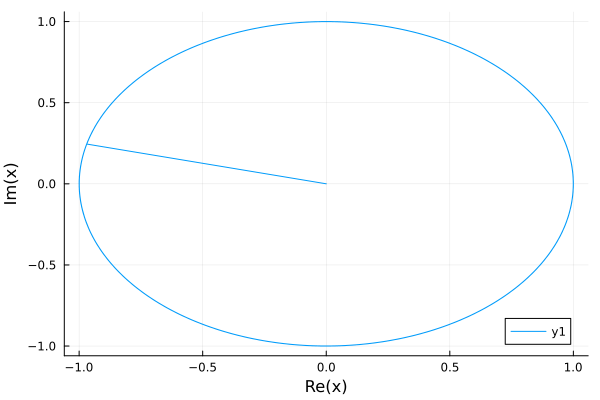

In [18]:
plot(uout[1,1,501,:])

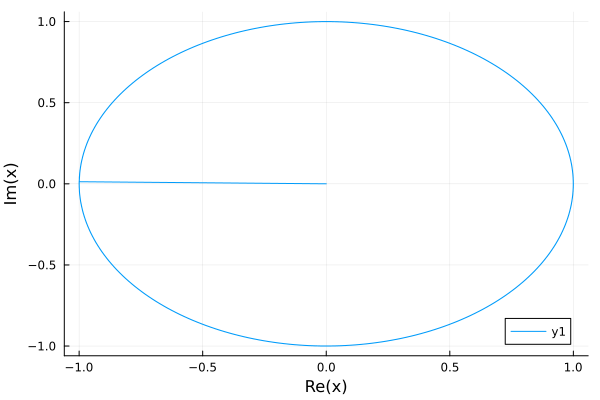

In [19]:
plot(uout[1,1,101,:])

# Binding

In [20]:
decoded = potential_to_phase(uout, tbase, dim=4, spk_args=spk_args);

In [21]:
err = (decoded[1,:,:,:] .- b[1,:,:]);

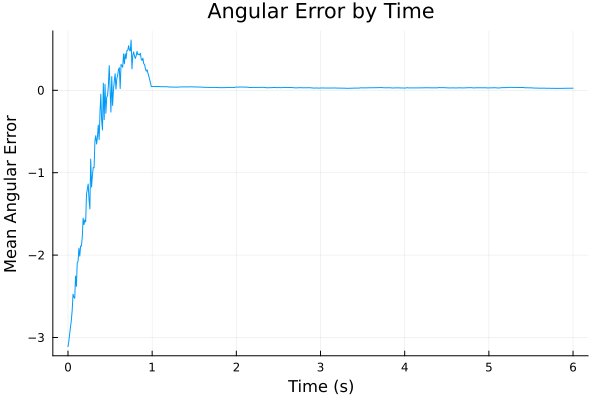

In [22]:
fig = plot(tbase, pi .* (mean(err, dims=2)) |> vec, label=missing)
ylabel!("Mean Angular Error")
xlabel!("Time (s)")
title!("Angular Error by Time")

In [23]:
png(fig, "bind time error.png")

"bind time error.png"

In [24]:
b2 = bind(st_x, st_y, tspan=tspan, return_solution=false);

In [25]:
b2d = train_to_phase(b2, spk_args);

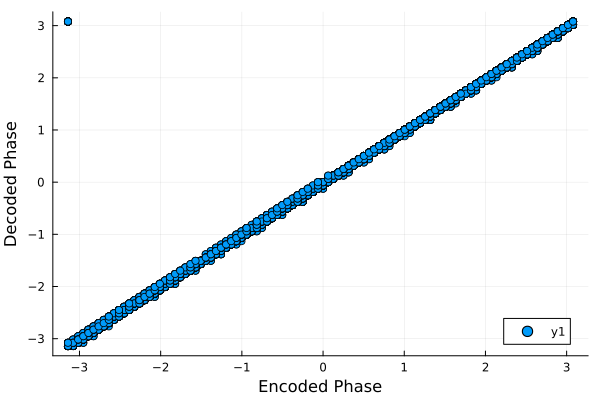

In [26]:
fig = scatter(pi .* b2d[5,:,:,:] |> vec, pi .* b |> vec)
xlabel!("Encoded Phase")
ylabel!("Decoded Phase")

In [27]:
png(fig, "bind phase error.png")

"bind phase error.png"

In [28]:
enc_error = filter(x -> !isnan(x), vec(b2d[5,:,:,:]) .- vec(b));

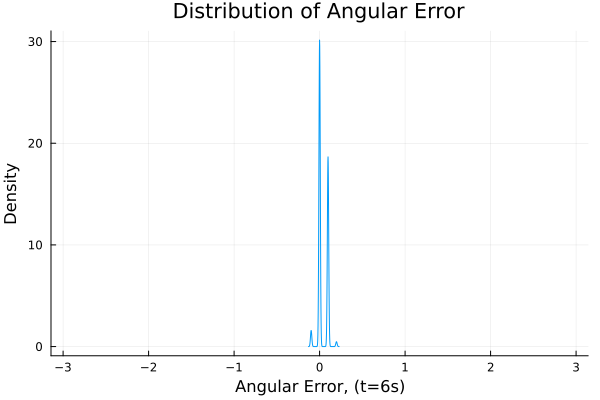

In [29]:
fig = density(pi .* sin.(0.5 .* pi .* enc_error), label=missing, xlims=(-pi, pi))
xlabel!("Angular Error, (t=6s)")
ylabel!("Density")
title!("Distribution of Angular Error")

In [30]:
png(fig, "bind error density.png")

"bind error density.png"

# Unbinding

In [31]:
function unbind(x::SpikeTrain, y::SpikeTrain; kwargs...)
    u_output = bind(x, y, unbind=true; kwargs...)
end

unbind (generic function with 2 methods)

In [32]:
ubout = unbind(st_x, st_y, tspan=tspan, return_solution=true);

In [33]:
decoded = potential_to_phase(ubout, tbase, dim=4, spk_args=spk_args);

In [34]:
err = (decoded[1,:,:,:] .- ub[1,:,:]);

In [35]:
size(err)

(1, 10201, 601)

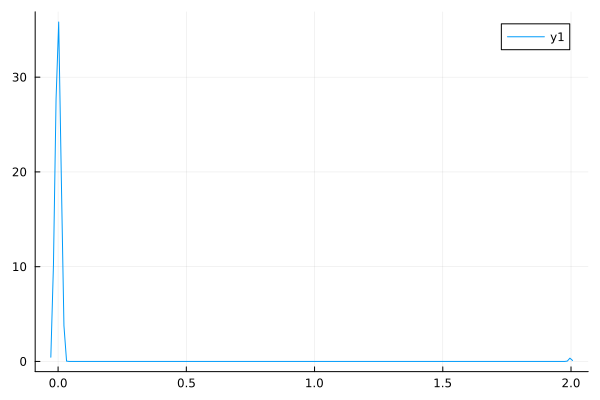

In [36]:
density(err[1,:,end])

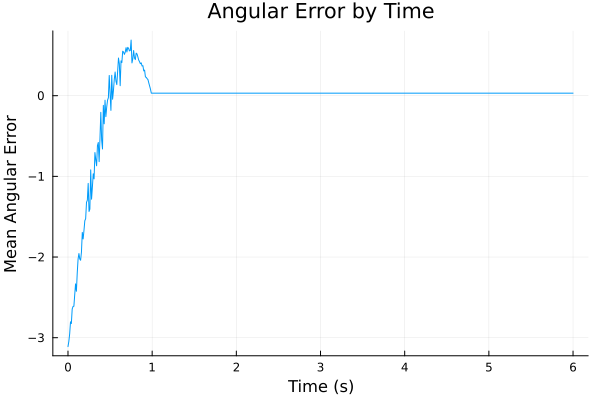

In [37]:
fig = plot(tbase, pi .* (mean(err, dims=2)) |> vec, label=missing)
ylabel!("Mean Angular Error")
xlabel!("Time (s)")
title!("Angular Error by Time")

In [38]:
png(fig, "unbind time error.png")

"unbind time error.png"

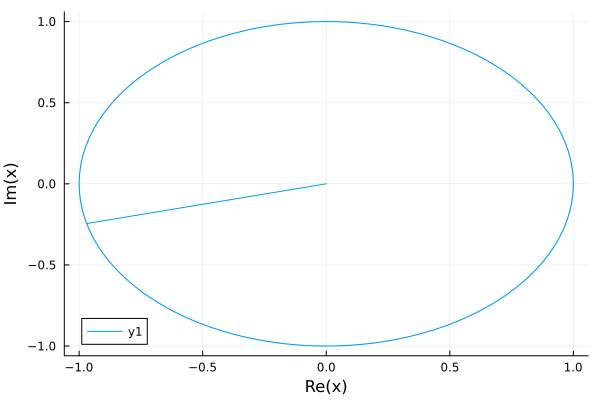

In [39]:
plot(ubout[1,1,501,:])

In [40]:
ub[501]

-0.16000000000000014

In [41]:
ub2 = unbind(st_x, st_y, tspan=tspan, return_solution=false);

In [42]:
ub2d = train_to_phase(ub2, spk_args);

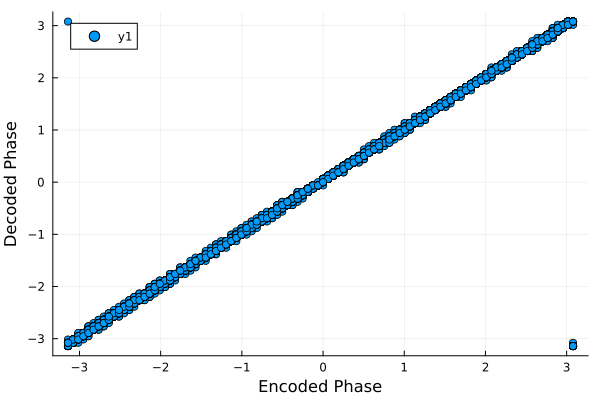

In [43]:
fig = scatter(pi .* ub2d[5,:,:,:] |> vec, pi .* ub |> vec)
xlabel!("Encoded Phase")
ylabel!("Decoded Phase")

In [44]:
png(fig, "unbind phase error.png")

"unbind phase error.png"

In [45]:
enc_error = filter(x -> !isnan(x), vec(ub2d[5,:,:,:]) .- vec(ub));

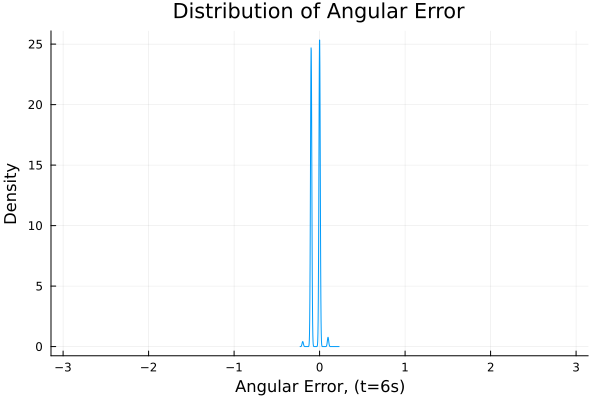

In [46]:
fig = density(pi .* sin.(0.5 .* pi .* enc_error), label=missing, xlims=(-pi, pi))
xlabel!("Angular Error, (t=6s)")
ylabel!("Density")
title!("Distribution of Angular Error")

In [47]:
png(fig, "unbind error density.png")

"unbind error density.png"